In [1]:
#imports
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, jaccard_score


## Inception V3 ##

### Data Loading and Transformations ###

In [2]:
#Data load
#load the data from preprocessed data
train_data_dir = 'Preprocessed_Data_2/train'
test_data_dir = 'Preprocessed_Data_2/test'
img_width, img_height = 299, 299
batch_size = 32
num_classes = 3

In [3]:
# Data Augmentation and Normalization for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for Testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [4]:
# Load and Augment Training Data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load Test Data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


### Model Architecture ###

In [6]:
#model architecture inception v3
def InceptionV3():
    model = Sequential()

    # Stem
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu', input_shape=(299, 299, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Inception Module A
    model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    # Inception Module B
    model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
    model.add(Conv2D(128, kernel_size=(1, 7), activation='relu'))
    model.add(Conv2D(128, kernel_size=(7, 1), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

    # Inception Module C
    model.add(Conv2D(256, kernel_size=(1, 1), activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(2, 2), activation='relu'))

    # Flatten and fully connected layers
    model.add(AveragePooling2D(pool_size=(8, 8)))
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 units

    return model

In [7]:
# Create the Inception v3 model with 3 output classes
inception_v3_model = InceptionV3()

# Display model summary
inception_v3_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 73, 73, 64)        2112      
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 69, 69, 64)        36928     
                                                      

### Model Training ###

In [8]:
#train inceptionV3
inception_v3_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
epochs = 20

# Fit the model
history = inception_v3_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator, 
)

Epoch 1/20


161/161 [==============================] - 497s 3s/step - loss: 0.7451 - accuracy: 0.6952 - val_loss: 0.4020 - val_accuracy: 0.8447
Epoch 2/20
161/161 [==============================] - 407s 3s/step - loss: 0.4949 - accuracy: 0.7980 - val_loss: 0.3618 - val_accuracy: 0.8874
Epoch 3/20
161/161 [==============================] - 409s 3s/step - loss: 0.4321 - accuracy: 0.8274 - val_loss: 0.2601 - val_accuracy: 0.9068
Epoch 4/20
161/161 [==============================] - 445s 3s/step - loss: 0.3346 - accuracy: 0.8787 - val_loss: 0.2826 - val_accuracy: 0.8998
Epoch 5/20
161/161 [==============================] - 460s 3s/step - loss: 0.3107 - accuracy: 0.8876 - val_loss: 0.2187 - val_accuracy: 0.9224
Epoch 6/20
161/161 [==============================] - 455s 3s/step - loss: 0.2915 - accuracy: 0.8976 - val_loss: 0.2097 - val_accuracy: 0.9278
Epoch 7/20
161/161 [==============================] - 436s 3s/step - loss: 0.2540 - accuracy: 0.9108 - val_loss: 0.2086 - val_accuracy: 0.92

save the trained model

In [12]:
inception_v3_model.save("Inception_V3_BASE")

INFO:tensorflow:Assets written to: Inception_V3_BASE\assets


INFO:tensorflow:Assets written to: Inception_V3_BASE\assets


### Training Visualizations ###

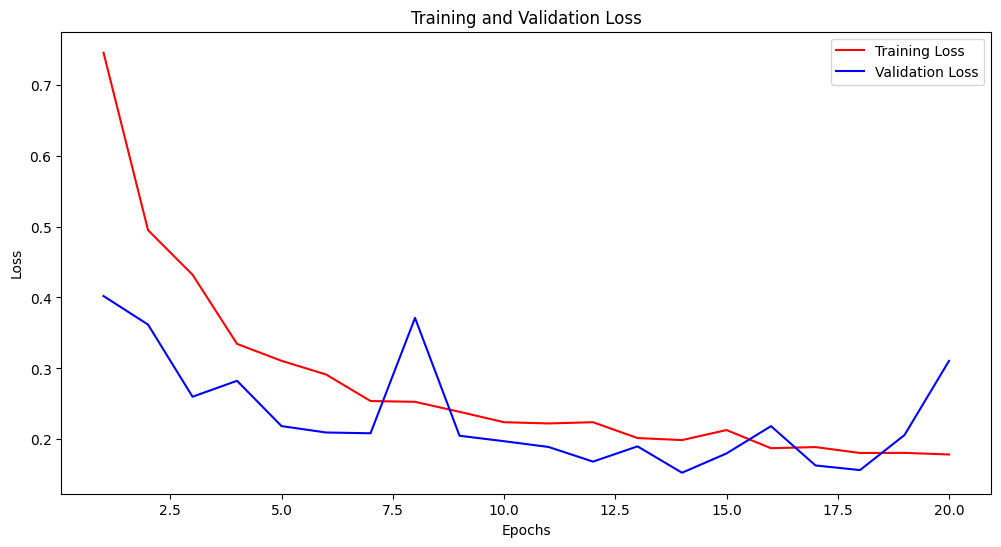

In [18]:
# Retrieve a list of training and validation losses and accuracies
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Number of epochs
epochs_range = range(1, epochs + 1)

# Create the plots for training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

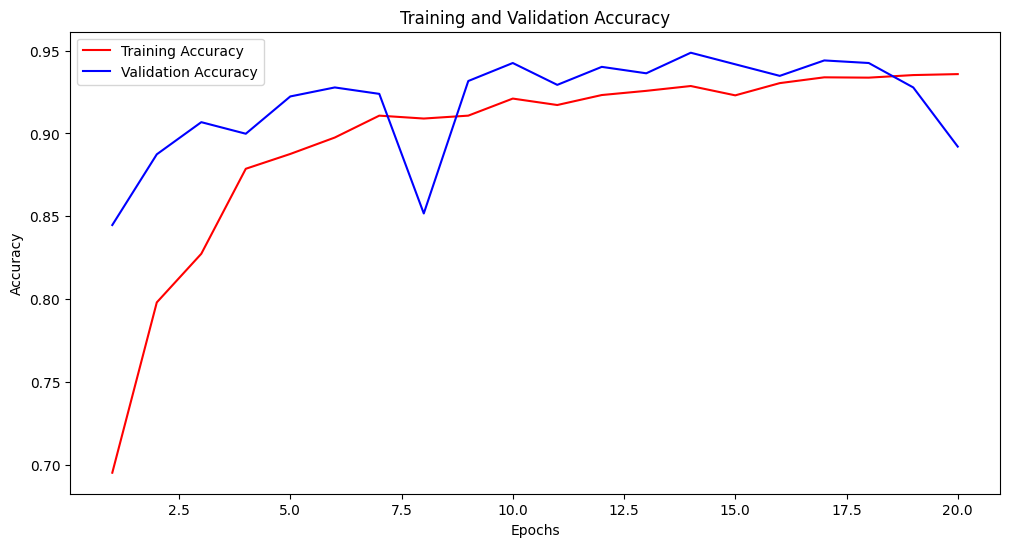

In [19]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create the plots for training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
loaded_inceptionV3 = load_model("D:\8th_semester\DL\DL_Project\models\Inception_V3_BASE")

### Predict, Test and Evaluate the Model ###

In [23]:
# Test the Model
test_loss, test_accuracy = loaded_inceptionV3.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict
y_true = test_generator.classes
y_pred = loaded_inceptionV3.predict(test_generator)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
print("Predicted Classes = " ,y_pred_classes)


#Evaluate the Model
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

41/41 [==============================] - 22s 537ms/step - loss: 0.3106 - accuracy: 0.8921
Test Loss: 0.31060081720352173
Test Accuracy: 0.8920807242393494
41/41 [==============================] - 24s 572ms/step
Predicted Classes =  [2 1 2 ... 1 1 2]
Classification Report:
               precision    recall  f1-score   support

  COVID19_RGB       0.08      0.06      0.07       116
   NORMAL_RGB       0.22      0.28      0.25       317
PNEUMONIA_RGB       0.66      0.62      0.64       855

     accuracy                           0.49      1288
    macro avg       0.32      0.32      0.32      1288
 weighted avg       0.50      0.49      0.49      1288

Confusion Matrix:
[[  7  40  69]
 [ 26  89 202]
 [ 56 269 530]]


In [20]:

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred_classes)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-Score for each class:", f1_score)

# Calculate Jaccard Score for each class
jaccard_scores = jaccard_score(y_true, y_pred_classes, average=None)
print("Jaccard Score for each class:", jaccard_scores)

# Calculate Type 1 error and Type 2 error for each class
# Type 1 error (False Positives) - how many times a class was predicted but shouldn't have been
type_1_errors = confusion_mat.sum(axis=0) - np.diag(confusion_mat)  # Column-wise sum minus the diagonal

# Type 2 error (False Negatives) - how many times a class wasn't predicted but should have been
type_2_errors = confusion_mat.sum(axis=1) - np.diag(confusion_mat)  # Row-wise sum minus the diagonal

print("Type 1 Errors for each class:", type_1_errors)
print("Type 2 Errors for each class:", type_2_errors)

Precision for each class: [0.12359551 0.25628141 0.67540574]
Recall for each class: [0.09482759 0.32176656 0.63274854]
F1-Score for each class: [0.10731707 0.28531469 0.65338164]
Jaccard Score for each class: [0.05670103 0.16639478 0.48520179]
Type 1 Errors for each class: [ 78 296 260]
Type 2 Errors for each class: [105 215 314]


In [10]:
#class to index mapping
print("Class Indices:", train_generator.class_indices)

Class Indices: {'COVID19_RGB': 0, 'NORMAL_RGB': 1, 'PNEUMONIA_RGB': 2}


### New Image Class Prediction ###

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Load and preprocess the test image
img_path = 'test_image.jpg'  
img_width, img_height = 299, 299 
image = load_img(img_path, target_size=(img_width, img_height)) 
image_array = img_to_array(image)  # Convert the image to an array
image_array = image_array / 255.0  # Normalize the image
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

In [12]:
# Make a prediction
prediction = loaded_inceptionV3.predict(image_array)  

# Get the class with the highest probability
predicted_class = np.argmax(prediction)  
print(predicted_class)
if (predicted_class == 0):
    print("COVID 19")
elif(predicted_class == 1):
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 115ms/step
0
COVID 19
